In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
import collections
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [3]:
df = pd.read_csv(r"C:\Users\sk062\OneDrive\デスクトップ\西新宿 自動運転アンケート2025.2.21~24.csv　108名バージョン\西新宿 自動運転アンケート2025.2.21~24.csv")

df.iloc[:, 6] = df.iloc[:, 6].replace('①希望する', 1)
df.iloc[:, 6] = df.iloc[:, 6].replace('②どちらかというと希望する', 2)
df.iloc[:, 6] = df.iloc[:, 6].replace('③どちらかというと希望しない', 3)
df.iloc[:, 6] = df.iloc[:, 6].replace('④希望しない', 4)

df.iloc[:, 9] = df.iloc[:, 9].replace('①週５回以上', 1)
df.iloc[:, 9] = df.iloc[:, 9].replace('②週３～４回', 2)
df.iloc[:, 9] = df.iloc[:, 9].replace('③週１～２回', 3)
df.iloc[:, 9] = df.iloc[:, 9].replace('④月に１～３回', 4)
df.iloc[:, 9] = df.iloc[:, 9].replace('⑤年に数回以下', 5)

df.iloc[:, 10] = df.iloc[:, 10].replace('①１００円以下', 1)
df.iloc[:, 10] = df.iloc[:, 10].replace('②１５０円', 2)
df.iloc[:, 10] = df.iloc[:, 10].replace('③２００円', 3)
df.iloc[:, 10] = df.iloc[:, 10].replace('④２５０円', 4)
df.iloc[:, 10] = df.iloc[:, 10].replace('⑤３００円', 5)

df.iloc[:, 11] = df.iloc[:, 11].replace('①危険を感じた', 1)
df.iloc[:, 11] = df.iloc[:, 11].replace('②危険を感じなかった', 2)

df.iloc[:, 13] = df.iloc[:, 13].replace('①興味本位', 1)
df.iloc[:, 13] = df.iloc[:, 13].replace('②家族・友人に誘われたから', 2)
df.iloc[:, 13] = df.iloc[:, 13].replace('③試しに乗ってみた（視察含む）', 3)
df.iloc[:, 13] = df.iloc[:, 13].replace('⑤自動運動システムに興味があった', 5)
df.iloc[:, 13] = df.iloc[:, 13].replace('⑥通勤（都庁）', 6)
df.iloc[:, 13] = df.iloc[:, 13].replace('⑦通勤（都庁以外）', 7)
df.iloc[:, 13] = df.iloc[:, 13].replace('⑧業務', 8)
df.iloc[:, 13] = df.iloc[:, 13].replace('⑨趣味・コミュニティ活動', 9)
df.iloc[:, 13] = df.iloc[:, 13].replace('⑩通院/健康関係', 10)
df.iloc[:, 13] = df.iloc[:, 13].replace('⑪行政機関利用', 11)
df.iloc[:, 13] = df.iloc[:, 13].replace('⑫金融/郵便関係利用', 12)
df.iloc[:, 13] = df.iloc[:, 13].replace('⑬外食', 13)
df.iloc[:, 13] = df.iloc[:, 13].replace('⑭日用品の購入', 14)
df.iloc[:, 13] = df.iloc[:, 13].replace('⑮（日用品を除く）物品の購入/サービス契約', 15)
df.iloc[:, 13] = df.iloc[:, 13].replace('⑯仕事以外の方（知人/友人/家族等）の面会', 16)

df.iloc[:, 19] = df.iloc[:, 19].replace('①全面的に協力できる', 1)
df.iloc[:, 19] = df.iloc[:, 19].replace('②やや協力できる', 2)
df.iloc[:, 19] = df.iloc[:, 19].replace('③普通', 3)
df.iloc[:, 19] = df.iloc[:, 19].replace('④やや協力できない', 4)
df.iloc[:, 19] = df.iloc[:, 19].replace('⑤全面的に協力できない', 5)

df.iloc[:, 20] = df.iloc[:, 20].replace('①全面的に協力できる', 1)
df.iloc[:, 20] = df.iloc[:, 20].replace('②やや協力できる', 2)
df.iloc[:, 20] = df.iloc[:, 20].replace('③普通', 3)
df.iloc[:, 20] = df.iloc[:, 20].replace('④やや協力できない', 4)
df.iloc[:, 20] = df.iloc[:, 20].replace('⑤全面的に協力できない', 5)

df.iloc[:, 21] = df.iloc[:, 21].replace('①全面的に協力できる', 1)
df.iloc[:, 21] = df.iloc[:, 21].replace('②やや協力できる', 2)
df.iloc[:, 21] = df.iloc[:, 21].replace('③普通', 3)
df.iloc[:, 21] = df.iloc[:, 21].replace('④やや協力できない', 4)
df.iloc[:, 21] = df.iloc[:, 21].replace('⑤全面的に協力できない', 5)

df.iloc[:, 22] = df.iloc[:, 22].replace('①全面的に協力できる', 1)
df.iloc[:, 22] = df.iloc[:, 22].replace('②やや協力できる', 2)
df.iloc[:, 22] = df.iloc[:, 22].replace('③普通', 3)
df.iloc[:, 22] = df.iloc[:, 22].replace('④やや協力できない', 4)
df.iloc[:, 22] = df.iloc[:, 22].replace('⑤全面的に協力できない', 5)

df.iloc[:, 23] = df.iloc[:, 23].replace('①全面的に協力できる', 1)
df.iloc[:, 23] = df.iloc[:, 23].replace('②やや協力できる', 2)
df.iloc[:, 23] = df.iloc[:, 23].replace('③普通', 3)
df.iloc[:, 23] = df.iloc[:, 23].replace('④やや協力できない', 4)
df.iloc[:, 23] = df.iloc[:, 23].replace('⑤全面的に協力できない', 5)

df.iloc[:, 24] = df.iloc[:, 24].replace('①全面的に協力できる', 1)
df.iloc[:, 24] = df.iloc[:, 24].replace('②やや協力できる', 2)
df.iloc[:, 24] = df.iloc[:, 24].replace('③普通', 3)
df.iloc[:, 24] = df.iloc[:, 24].replace('④やや協力できない', 4)
df.iloc[:, 24] = df.iloc[:, 24].replace('⑤全面的に協力できない', 5)

df.iloc[:, 25] = df.iloc[:, 25].replace('①全面的に協力できる', 1)
df.iloc[:, 25] = df.iloc[:, 25].replace('②やや協力できる', 2)
df.iloc[:, 25] = df.iloc[:, 25].replace('③普通', 3)
df.iloc[:, 25] = df.iloc[:, 25].replace('④やや協力できない', 4)
df.iloc[:, 25] = df.iloc[:, 25].replace('⑤全面的に協力できない', 5)

df.iloc[:, 26] = df.iloc[:, 26].replace('①全面的に協力できる', 1)
df.iloc[:, 26] = df.iloc[:, 26].replace('②やや協力できる', 2)
df.iloc[:, 26] = df.iloc[:, 26].replace('③普通', 3)
df.iloc[:, 26] = df.iloc[:, 26].replace('④やや協力できない', 4)
df.iloc[:, 26] = df.iloc[:, 26].replace('⑤全面的に協力できない', 5)

df.iloc[:,1] = df.iloc[:,1].replace({'男性': 1, '女性': 2, '無回答': 0})
df.iloc[:,2] = df.iloc[:,2].replace({'10代未満': 5.0, '10代': 15, '20代': 25, '30代': 35, '40代': 45, '50代': 55, '60代': 65, '70代以上': 75})
df.iloc[:,4] = df.iloc[:,4].replace({'神奈川県': 1, 'その他': 0, '東京都（23区以外）': 2, '23区（新宿区以外）': 3, '新宿区': 4})

df.iloc[:, 3] = df.iloc[:, 3].replace('関係者', 1)
df.iloc[:, 3] = df.iloc[:, 3].replace('他地域からの来訪者', 2)
df.iloc[:, 3] = df.iloc[:, 3].replace('地域住民', 3)

df.iloc[:, 5] = df.iloc[:, 5].replace('今回試乗していない', 1)
df.iloc[:, 5] = df.iloc[:, 5].replace('初めて参加した', 2)
df.iloc[:, 5] = df.iloc[:, 5].replace('1回参加した', 3)
df.iloc[:, 5] = df.iloc[:, 5].replace('複数回参加した', 4)

df.iloc[:, 15] = df.iloc[:, 15].replace('⑤不満', 5)
df.iloc[:, 15] = df.iloc[:, 15].replace('④やや不満', 4)
df.iloc[:, 15] = df.iloc[:, 15].replace('③普通', 3)
df.iloc[:, 15] = df.iloc[:, 15].replace('②やや満足', 2)
df.iloc[:, 15] = df.iloc[:, 15].replace('①満足', 1)
df.iloc[:, 6] = df.iloc[:, 6].map(lambda x: 1 if x == 2 else 0 if x in [3, 4] else x)
df.iloc[:, 6].unique()
df = df.fillna(0)

C:\Users\sk062\AppData\Local\Temp\ipykernel_2096\4281656855.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.iloc[:, 6] = df.iloc[:, 6].replace('④希望しない', 4)
C:\Users\sk062\AppData\Local\Temp\ipykernel_2096\4281656855.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.iloc[:, 9] = df.iloc[:, 9].replace('⑤年に数回以下', 5)
C:\Users\sk062\AppData\Local\Temp\ipykernel_2096\4281656855.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitl

In [30]:
Y = df.iloc[:,6]
X = df.iloc[:, [1,2,3,4,5,9,10,11,15,19,20,21,22,23,24,25,26]]

回帰係数: [-0.04138378  0.02311959 -0.0182892  -0.00692874  0.06697668  0.15057573
  0.07810638  0.09504807  0.08984627 -0.0177223  -0.0192637  -0.0267442
 -0.04214191  0.00704589  0.00030668 -0.0235776  -0.00077723]
切片: [0.04742755]
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95        10
         1.0       1.00      0.92      0.96        12

    accuracy                           0.95        22
   macro avg       0.95      0.96      0.95        22
weighted avg       0.96      0.95      0.95        22



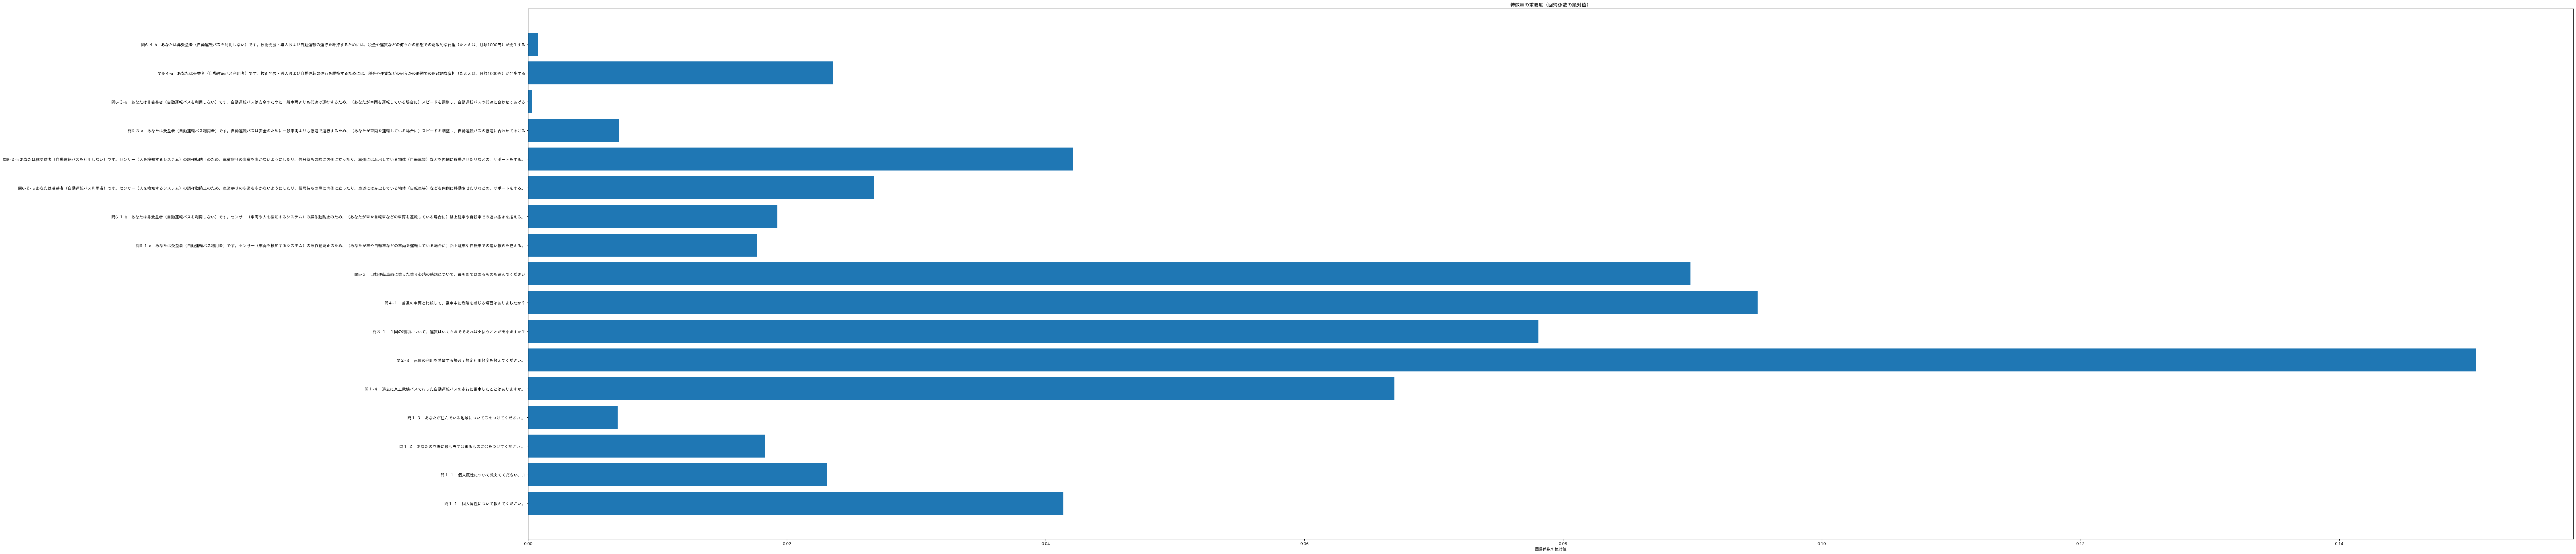

In [31]:
# データをトレーニングセットとテストセットに分ける
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# 特徴量のスケーリング
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ロジスティック回帰モデルの作成と訓練
model = LogisticRegressionCV(cv=5, penalty='l2', solver='liblinear', max_iter=1000)
model.fit(X_train_scaled, y_train)

# 回帰係数を取得
coefficients = model.coef_[0]
intercept = model.intercept_

# 回帰係数を表示
print("回帰係数:", coefficients)
print("切片:", intercept)

# モデルのパフォーマンスを評価
y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

# 回帰係数の絶対値をプロットして、どの特徴量が重要かを視覚化
plt.figure(figsize=(92, 24))
plt.barh(X.columns, np.abs(coefficients))
plt.xlabel("回帰係数の絶対値")
plt.title("特徴量の重要度（回帰係数の絶対値）")

plt.savefig(r"C:\Users\sk062\OneDrive\デスクトップ\回帰係数.png", format='png')

plt.show()

# 各説明変数の影響力を評価するための解釈：
# 回帰係数が大きい（絶対値が大きい）特徴量が最も強い影響を与えると見なされます。
# また、正の回帰係数はその特徴量が目的変数を増加させる方向に影響し、
# 負の回帰係数は減少させる方向に影響します。


In [32]:
# 回帰係数をDataFrameに変換して表示
coefficients = model.coef_[0]
features = X.columns  # 特徴量の名前

# DataFrameに変換
coefficients_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
})

# 回帰係数を降順でソートして表示
print(coefficients_df.sort_values(by='Coefficient', ascending=False))


                                              Feature  Coefficient
5                   問２-３　再度の利用を希望する場合：想定利用頻度を教えてください。     0.150576
7                問４-１　普通の車両と比較して、乗車中に危険を感じる場面はありましたか？     0.095048
8        問5-３　自動運転車両に乗った乗り心地の感想について、最もあてはまるものを選んでください     0.089846
6             問３-１　１回の利用について、運賃はいくらまでであれば支払うことが出来ますか？     0.078106
4           問１-４　過去に京王電鉄バスで行った自動運転バスの走行に乗車したことはありますか。     0.066977
1                             問１-１　個人属性について教えてください。.1     0.023120
13  問6-３-a　あなたは受益者（自動運転バス利用者）です。自動運転バスは安全のために一般車両よ...     0.007046
14  問6-３-b　あなたは非受益者（自動運転バスを利用しない）です。自動運転バスは安全のために一...     0.000307
16  問6-４-b　あなたは非受益者（自動運転バスを利用しない）です。技術発展・導入および自動運転...    -0.000777
3                     問１-３　あなたが住んでいる地域について〇をつけてください 。    -0.006929
9   問6-１-a　あなたは受益者（自動運転バス利用者）です。センサー（車両を検知するシステム）の...    -0.017722
2                   問１-２　あなたの立場に最も当てはまるものに〇をつけてください 。    -0.018289
10  問6-１-b　あなたは非受益者（自動運転バスを利用しない）です。センサー（車両や人を検知する...    -0.019264
15  問6-４-a　あなたは受益者（自動運転バス利用者）です。技術発展・導入および自動運転の運行を...    -0.02

In [29]:
# 定数項（バイアス）をXに追加
X_with_const = sm.add_constant(X_train_scaled)

# ロジスティック回帰モデルをstatsmodelsで適合
logit_model = sm.Logit(y_train, X_with_const)
result = logit_model.fit()

# 結果から回帰係数、p-value、信頼区間を取得
coefficients = result.params[1:]  # バイアス項を除いた回帰係数
p_values = result.pvalues[1:]  # バイアス項を除いたp値
conf_int = result.conf_int(alpha=0.05)[1:]  # 95%信頼区間（バイアス項を除く）

# 結果をデータフレームにまとめる
coefficients_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients,
    'p-value': p_values,
    'CI Lower Bound': conf_int[0],
    'CI Upper Bound': conf_int[1]
})

# 回帰係数で降順にソートして表示
print(coefficients_df.sort_values(by='Coefficient', ascending=False))


Optimization terminated successfully.
         Current function value: 0.217651
         Iterations 9
                                               Feature  Coefficient   p-value  \
x5                   問２-３　再度の利用を希望する場合：想定利用頻度を教えてください。     2.310913  0.002316   
x16  問6-４-b　あなたは非受益者（自動運転バスを利用しない）です。技術発展・導入および自動運転...     1.931536  0.128431   
x11  問6-２- a あなたは受益者（自動運転バス利用者）です。センサー（人を検知するシステム）の...     1.924968  0.213369   
x8        問5-３　自動運転車両に乗った乗り心地の感想について、最もあてはまるものを選んでください     1.536102  0.083018   
x7                問４-１　普通の車両と比較して、乗車中に危険を感じる場面はありましたか？     1.188182  0.224037   
x13  問6-３-a　あなたは受益者（自動運転バス利用者）です。自動運転バスは安全のために一般車両よ...     0.937164  0.573713   
x2                             問１-１　個人属性について教えてください。.1     0.913799  0.123424   
x9   問6-１-a　あなたは受益者（自動運転バス利用者）です。センサー（車両を検知するシステム）の...     0.474745  0.649513   
x1                               問１-１　個人属性について教えてください。    -0.083831  0.890671   
x3                   問１-２　あなたの立場に最も当てはまるものに〇をつけてください 。    -0.102738  0.864618   
x4     